# Introdução
## Previsão de Insuficiência Cardíaca - 12 características clínicas para prever eventos de morte.
----

### Sobre o Conjunto de Dados

*As doenças cardiovasculares (DCVs) são a **causa número 1** de morte em todo o mundo, levando cerca de **17,9 milhões de vidas** a cada ano, o que representa 31% de todas as mortes em todo o mundo.*

A insuficiência cardíaca é um evento comum causado por DCVs e este 
conjunto de dados contém 12 recursos que podem ser usados 
para prever a mortalidade por insuficiência cardíaca.


A maioria das doenças cardiovasculares pode ser prevenida abordando 
os fatores de risco comportamentais, como uso de tabaco, 
dieta não saudável e obesidade, sedentarismo e uso nocivo de álcool, 
usando estratégias para toda a população.


Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular 
(devido à presença de um ou mais fatores de risco, como hipertensão, 
diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e 
gerenciamento precoces , em que um modelo de aprendizado de máquina pode ser de grande ajuda.*

### **Dicionário de dados**

* ***age*** - Idade do Paciente
* ***anaemia*** - Diminuição de glóbulos vermelhos ou hemoglobina (booleano - 0 = Não, 1 = Sim)
* ***creatinine_phosphokinase*** - Nível da enzima CPK no sangue (mcg / L)
* ***diabetes*** - Se o paciente tem diabetes (booleano - 0 = Não, 1 = Sim)
* ***ejection_fraction*** - Porcentagem de sangue saindo do coração a cada contração (porcentagem)
* ***high_blood_pressure*** - Se o paciente tem hipertensão (booleano - 0 = Não, 1 = Sim)
* ***platelets*** - Plaquetas no sangue (quiloplacas / mL)
* ***serum_creatinine*** - Nível de creatinina sérica no sangue (mg / dL)
* ***serum_sodium*** - Nível de sódio sérico no sangue (mEq / L)
* **smoking** - Se o paciente fuma ou não (booleano - 0 = Não, 1 = Sim)
* ***sex*** - Mulher ou homem (binário - 1 = Masculino, 0 = Feminino)
* ***time*** - Período de acompanhamento (dias)
* ***DEATH_EVENT*** - Se o paciente faleceu durante o período de acompanhamento (booleano - 0 = Não, 1 = Sim)


#### Citação
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).
https://doi.org/10.1186/s12911-020-1023-5

In [1]:
# Importando bibliotecas necessárias para as análises e predições

# Bibliotecas de modelagem de dados
import numpy as np
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pré-processamento dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

# Modelos de Aprendizado de Máquina
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Módulo para avaliação dos modelos
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [2]:
# Definindo a função para avaliar os modelos
def model_evaluation(test, prediction):
    print('Accuracy:\n', metrics.accuracy_score(test, prediction)) 
    print('\nClass Balanced Accuracy:\n', metrics.balanced_accuracy_score(test, prediction)) 
    print('\nPrecision:\n', metrics.precision_score(test, prediction)) 
    print('\nRecall:\n', metrics.recall_score(test, prediction)) 
    print('\nF1:\n', metrics.f1_score(test, prediction))
    print('\nClassification Report\n', metrics.classification_report(test, prediction))

In [3]:
# # Definindo a função para avaliar os modelos
# def model_evaluation(test, prediction):
#     print('Confusion Matrix\n', metrics.confusion_matrix(test, prediction)) 
#     print('\nAccuracy\n', metrics.accuracy_score(test, prediction)) 
#     print('\nClass Balanced Accuracy\n', metrics.balanced_accuracy_score(test, prediction)) 
#     print('\nPrecision\n', metrics.precision_score(test, prediction)) 
#     print('\nRecall\n', metrics.recall_score(test, prediction)) 
#     print('\nF1\n', metrics.f1_score(test, prediction))
#     print('\nClassification Report\n', metrics.classification_report(test, prediction))

In [4]:
# Carrega o arquivo csv como DataFrame
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df2 = df.copy()

In [5]:
m = lambda x: 'Sim' if x == 1 else 'Não'
df2['sex'] = df2.sex.map({1: 'Masculino', 0: 'Feminino'})
df2['diabetes'] = df2['diabetes'].map(m)
df2['anaemia'] = df2['anaemia'].map(m)
df2['high_blood_pressure'] = df2['high_blood_pressure'].map(m)
df2['smoking'] = df2['smoking'].map(m)
df2['DEATH_EVENT'] = df2['DEATH_EVENT'].map(m)

In [6]:
def hist_box_plot(df, coluna):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(ax=axes[0], data = df[coluna]);
    axes[0].set_title(f'Histograma da Variável {coluna}')
    sns.boxplot(ax=axes[1], data = df[coluna]);
    axes[1].set_title(f'Boxplot da Variável {coluna}')
    plt.show();

# Explorando os dados
-----

* Exibe as 5 primeiras linhas do conjuto de dados

In [7]:
# Exibe as 5 primeiras linhas
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Não,582,Não,20,Sim,265000.00,1.9,130,Masculino,Não,4,Sim
1,55.0,Não,7861,Não,38,Não,263358.03,1.1,136,Masculino,Não,6,Sim
2,65.0,Não,146,Não,20,Não,162000.00,1.3,129,Masculino,Sim,7,Sim
3,50.0,Sim,111,Não,20,Não,210000.00,1.9,137,Masculino,Não,7,Sim
4,65.0,Sim,160,Sim,20,Não,327000.00,2.7,116,Feminino,Não,8,Sim


* Exibe algumas informações sobre as colunas do DataFrame

In [8]:
# Exibe algumas informações sobre as colunas do DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


# Explorando os dados

### Exibe um resumo estatístico sobre o conjunto de dados

In [9]:
# Exibe informações estatísticas sobre o conjunto de dados
df[
    ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
  ].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


### Visualizando os dados

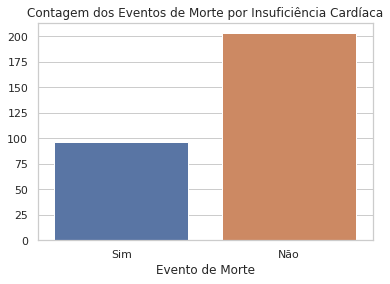

In [10]:
plt.title('Contagem dos Eventos de Morte por Insuficiência Cardíaca')
plt.xlabel('-')
ax = sns.countplot(data=df2, x='DEATH_EVENT')
ax.set(xlabel='Evento de Morte', ylabel='');

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

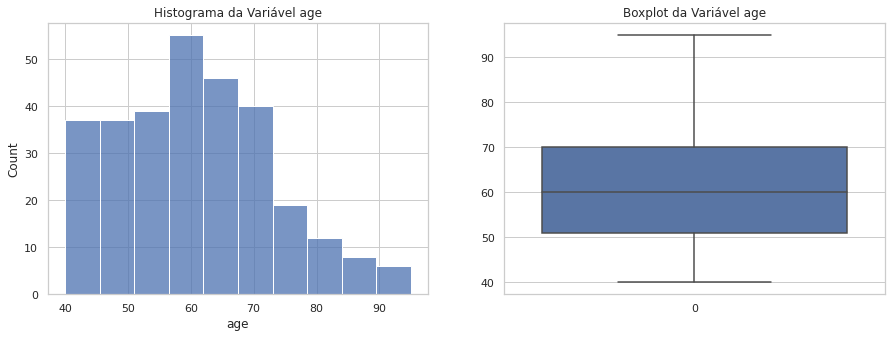

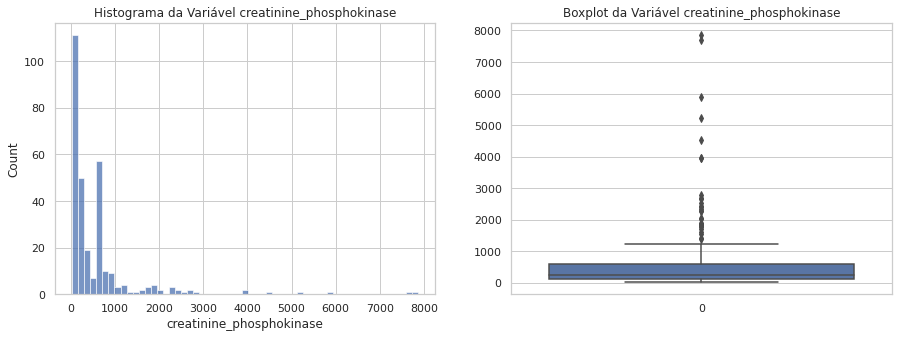

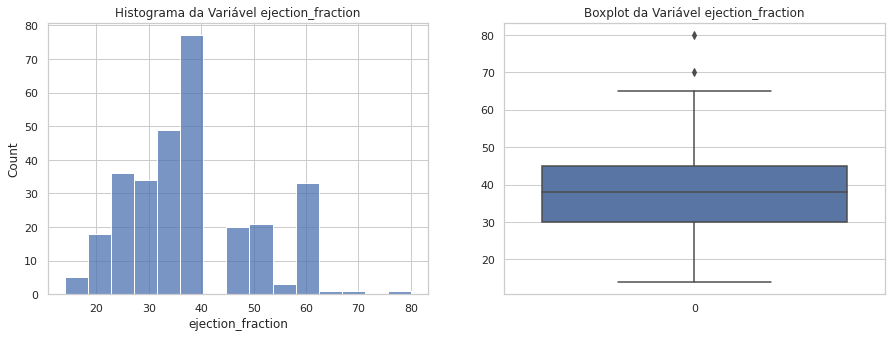

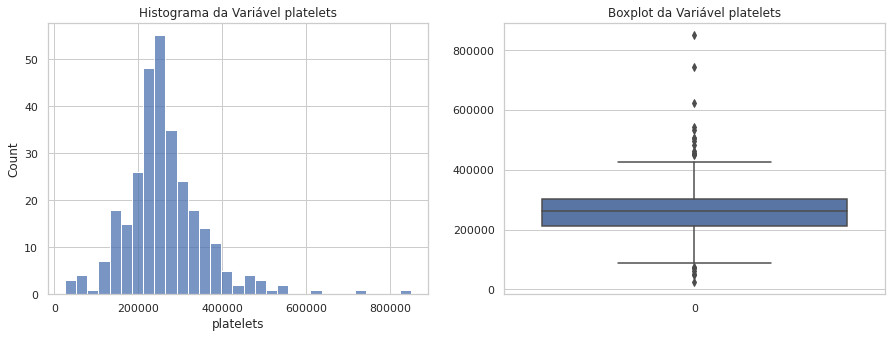

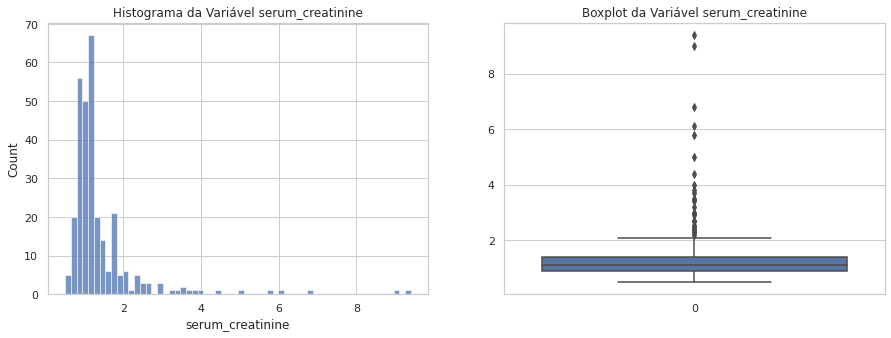

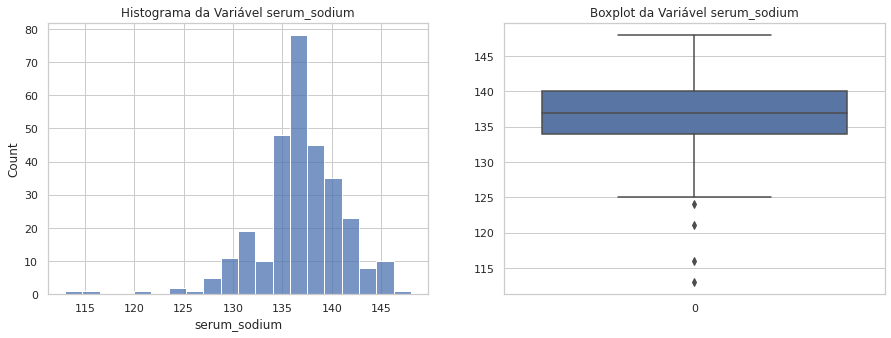

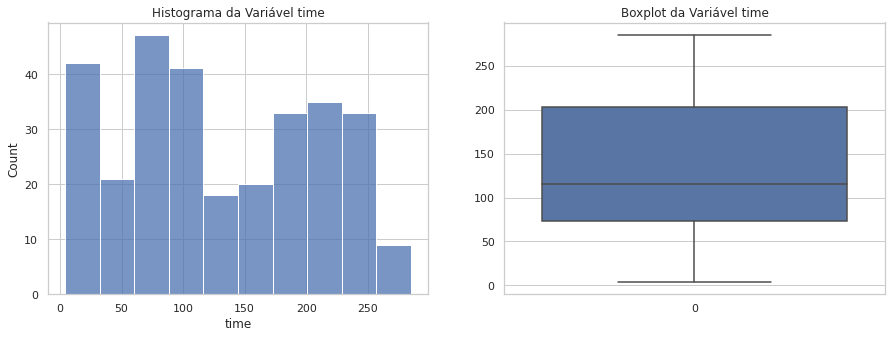

In [12]:
for col in df[
    ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
  ].columns:
    hist_box_plot(df[
    ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
  ], col)

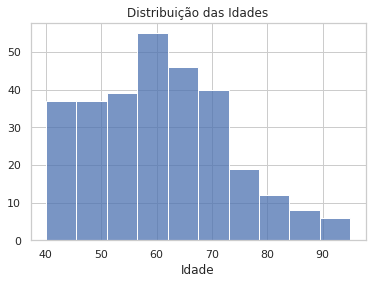

In [13]:
plt.title('Distribuição das Idades')
ax = sns.histplot(df.age)
ax.set(xlabel='Idade', ylabel='');

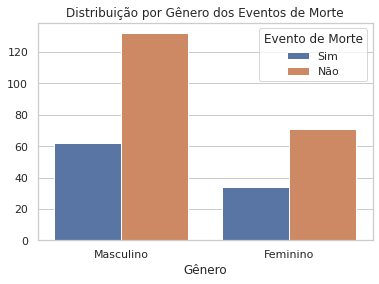

In [14]:
plt.title('Distribuição por Gênero dos Eventos de Morte')
ax = sns.countplot(x='sex', data=df2 , hue='DEATH_EVENT')
ax.legend(title='Evento de Morte')
ax.set(xlabel='Gênero', ylabel='');

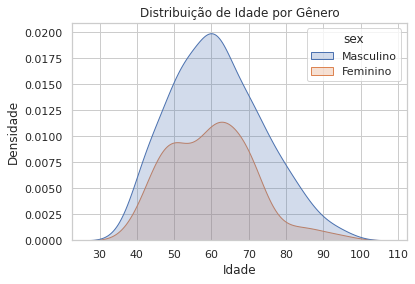

In [15]:
plt.title('Distribuição de Idade por Gênero')
ax = sns.kdeplot(x='age',hue='sex',data=df2, fill=True)
ax.set(xlabel='Idade', ylabel='Densidade');

In [16]:
fig = px.box(df2, y='age',x='sex',)
fig.update_layout(title_text='Boxplot das Idades por Gênero')
fig.show()

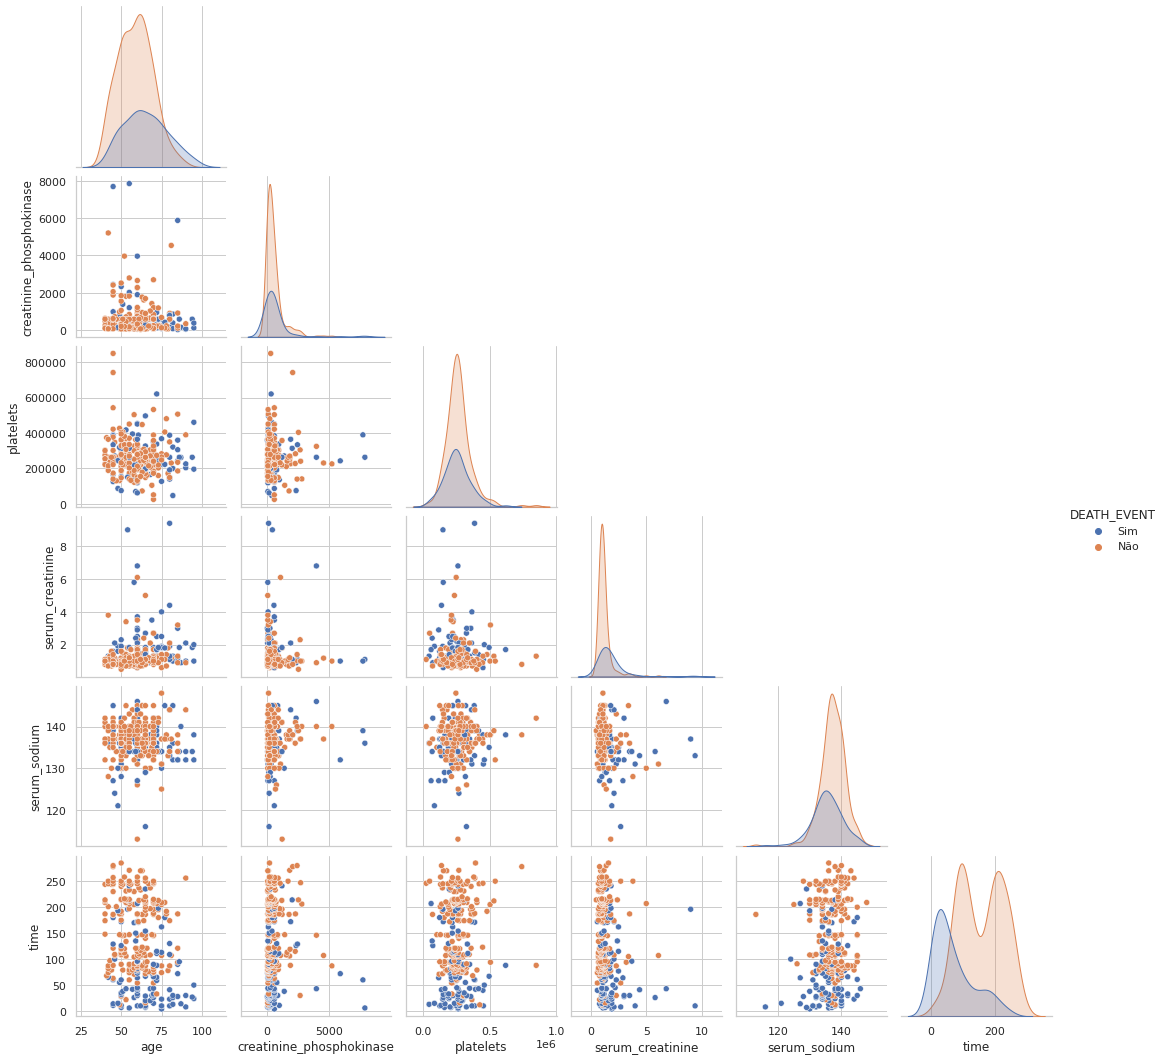

In [17]:
sns.pairplot(df2.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'ejection_fraction'], axis=1), hue='DEATH_EVENT', corner=True);

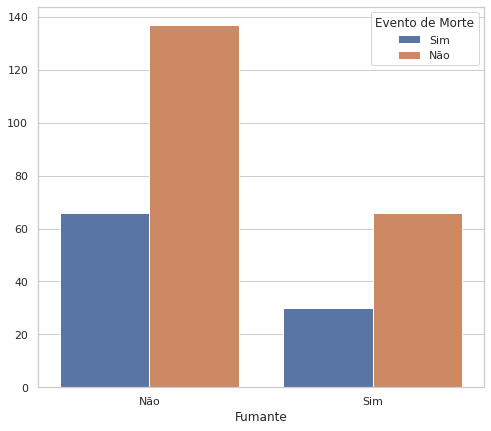

In [18]:
plt.figure(figsize=(8,7))
# df2['smoking'] = df2['smoking'].map({1: 'Fumante', 0: 'Não Fumante'})
ax=sns.countplot(
    x='smoking',
    data=df2 ,
    hue='DEATH_EVENT'
)
ax.legend(title='Evento de Morte')
ax.set(xlabel='Fumante', ylabel='');

* #### Exibe um mapa de calor de correlação entre variáveis
* #### É utilizada a correlação de Spearman por conter variáveis categóricas 

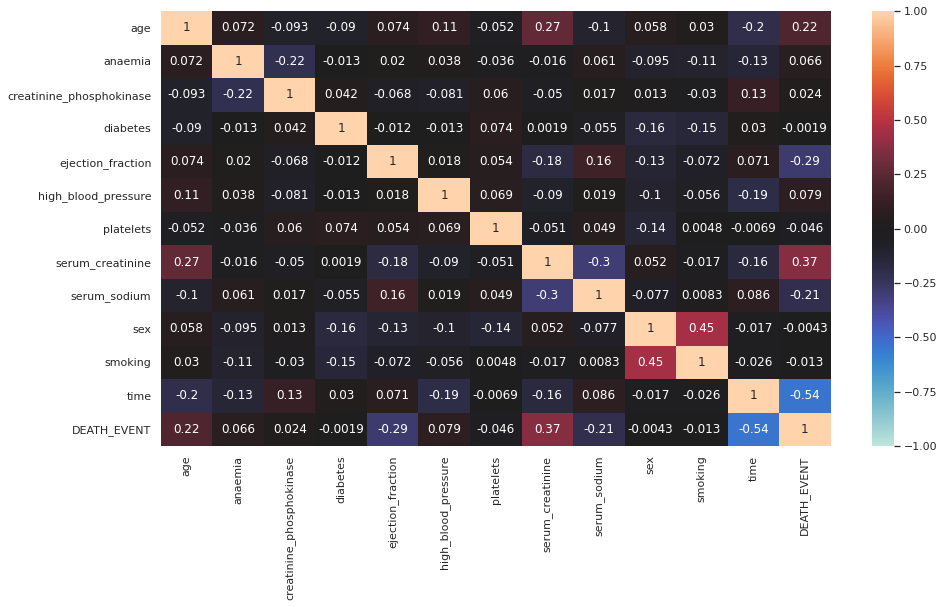

In [19]:
# Exibe um mapa de calor de correlação entre variáveis
# É utilizada a correlação de Spearman por conter variáveis categóricas 
plt.figure(figsize=(15,8))
corr = df.corr('spearman')
sns.heatmap(corr, annot=True, vmin=-1, center=0, vmax=1);

# **Pré Processamento**

In [20]:
# Variável dependente (alvo)
y = df.iloc[:,-1]

# Guarda as variáveis independentes (preditoras) do dataset 
# sem a coluna de rótulos
X = np.array(df.drop('DEATH_EVENT', axis=1))

print(X.shape)
print(y.shape)

(299, 12)
(299,)


* É realizada uma normalização nos dados removendo a média e escalonando para a variância da unidade

In [21]:
# Normalização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

* Com o objetivo de avaliar e garantir a capacidade de generalização dos modelos e evitar o sobreajuste (overfiting), é realizada uma Validação Cruzada juntamente com uma Divisão Estratificada, visto que os dados da variável destino não são equilibradas. Ainda é feita uma randomização diferente em cada repetição. 

In [22]:
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# **Treinando e Avaliando os Modelos de Aprendizado de Máquina**
---

* Primeiro, é realizada a instanciação do modelo com alguns hiperparâmetros ajustados

* Depois, é realizado o treinamento dos modelos com os dados de treino através da função "fit"

* Após o treinamento, são realizadas as predições com os dados de teste com a função "predict"

* Por fim, o modelo é avaliado utilizando algumas das principais métricas de avaliação, como a _Matriz de Confusão_ , _Acurácia_ , _Acurácia Balanceada por Classe_ , _Precisão_ , etc.

## **Logistic Regression**

### Classificador de Regressão Logística
A regressão logística binária é uma forma de regressão usada quando o dependente é uma dicotomia e os independentes são de qualquer tipo.

https://faculty.chass.ncsu.edu/garson/PA765/logistic.htm

In [23]:
# Instanciando o modelo
lr = LogisticRegression( penalty='l2', solver='liblinear', random_state=42)

# Treinando o modelo com os dados de treino
lr.fit(X_train, y_train)

# Realizando as predições com os dados de teste
y_predict = lr.predict(X_test)

In [24]:
# Avaliando o resultado do modelo de Regressão Logística
model_evaluation(test=y_test, prediction=y_predict)

Accuracy:
 0.8383838383838383

Class Balanced Accuracy:
 0.8152985074626866

Precision:
 0.75

Recall:
 0.75

F1:
 0.75

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        67
           1       0.75      0.75      0.75        32

    accuracy                           0.84        99
   macro avg       0.82      0.82      0.82        99
weighted avg       0.84      0.84      0.84        99



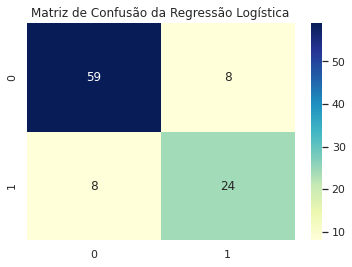

In [25]:
matrix = metrics.confusion_matrix(y_test, y_predict)
plt.title('Matriz de Confusão da Regressão Logística')
sns.heatmap(matrix, annot=True, cmap="YlGnBu");

## **SVC**
###  Classificador Máquina de Vetores de Suporte

* No algoritmo SVM, plotamos cada item de dados como um ponto no espaço n-dimensional (onde n é um número de recursos que você possui) com o valor de cada recurso sendo o valor de uma coordenada específica. Em seguida, realizamos a classificação encontrando o hiperplano que diferencia muito bem as duas classes.

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [26]:
# Instanciando o modelo
svc = SVC(kernel='linear', random_state=42)

# Treinando o modelo com os dados de treino
svc.fit(X_train, y_train)

# Realizando as predições com os dados de teste
y_predict = svc.predict(X_test)

In [27]:
# Avaliando o resultado do modelo do SVM
model_evaluation(test=y_test, prediction=y_predict)

Accuracy:
 0.8282828282828283

Class Balanced Accuracy:
 0.8078358208955223

Precision:
 0.7272727272727273

Recall:
 0.75

F1:
 0.7384615384615384

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        67
           1       0.73      0.75      0.74        32

    accuracy                           0.83        99
   macro avg       0.80      0.81      0.81        99
weighted avg       0.83      0.83      0.83        99



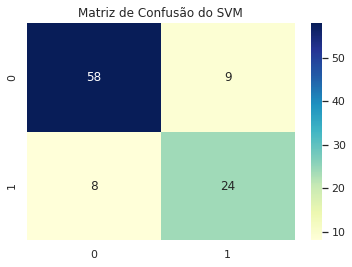

In [28]:
matrix = metrics.confusion_matrix(y_test, y_predict)
plt.title('Matriz de Confusão do SVM')
sns.heatmap(matrix, annot=True, cmap="YlGnBu");

## **Random Forest Classifiers**
### Classificador Floresta Aleatória

* Uma floresta aleatória é um metaestimador que ajusta vários classificadores de árvore de decisão em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random#sklearn.ensemble.RandomForestClassifier

In [29]:
# Instanciando o modelo
rf = RandomForestClassifier(criterion = 'entropy', bootstrap=True, 
                            max_depth=5, random_state=42)

# Treinando o modelo com os dados de treino
rf.fit(X_train, y_train)

# Realizando as predições com os dados de teste
y_predict = rf.predict(X_test)

In [30]:
# Avaliando o resultado do modelo de Floresta Aleatória
model_evaluation(test=y_test, prediction=y_predict)

Accuracy:
 0.9090909090909091

Class Balanced Accuracy:
 0.9001865671641791

Precision:
 0.8484848484848485

Recall:
 0.875

F1:
 0.8615384615384615

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.85      0.88      0.86        32

    accuracy                           0.91        99
   macro avg       0.89      0.90      0.90        99
weighted avg       0.91      0.91      0.91        99



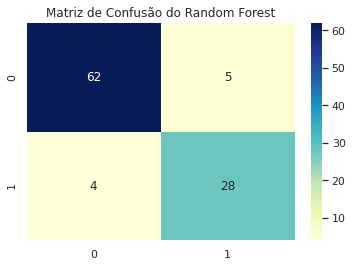

In [31]:
matrix = metrics.confusion_matrix(y_test, y_predict)
plt.title('Matriz de Confusão do Random Forest')
sns.heatmap(matrix, annot=True, cmap="YlGnBu");

## **AdaBoost**
### Classificador AdaBoost

* Um classificador AdaBoost é um metaestimador que começa ajustando um classificador no conjunto de dados original e, em seguida, ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados de modo que os classificadores subsequentes se concentrem mais em casos difíceis.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier

In [32]:
# Instanciando o algoritmo que será replicado
rfc = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.001, 
                             min_samples_leaf=2, max_depth=6, random_state=42
)

# Instanciando o algoritmo base
abc = AdaBoostClassifier( base_estimator=rfc, random_state=42 )

# Treinando o modelo
abc.fit(X_train, y_train)

# Realizando as previsões
y_predict = abc.predict(X_test)

In [33]:
# Avaliando o resultado do modelo de AdaBoost
model_evaluation(y_test, y_predict)

Accuracy:
 0.9191919191919192

Class Balanced Accuracy:
 0.9076492537313433

Precision:
 0.875

Recall:
 0.875

F1:
 0.875

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.88      0.88      0.88        32

    accuracy                           0.92        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.92      0.92      0.92        99



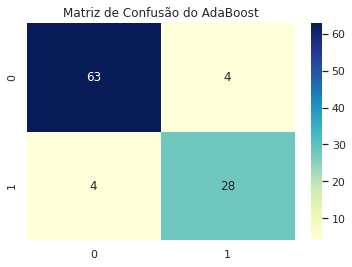

In [34]:
matrix = metrics.confusion_matrix(y_test, y_predict)
plt.title('Matriz de Confusão do AdaBoost')
sns.heatmap(matrix, annot=True, cmap="YlGnBu");